# Boston Housing dataset
The Boston Housing data was collected from homes in suburbs of Boston, Massachusetts, in 1978 .

*   Data points: 506
*   Dimensions: 14 (13 features, 1 output MEDV)
1.   **CRIM** - per capita crime rate by town
1.   **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
2.   **INDUS** - proportion of non-retail business acres per town.
1.   **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
2.   **NOX** - nitric oxides concentration (parts per 10 million)
1.   **RM** - average number of rooms per dwelling
2.   **AGE** - proportion of owner-occupied units built prior to 1940
1.   **DIS** - weighted distances to five Boston employment centres
2.   **RAD** - index of accessibility to radial highways
1.   **TAX** - full-value property-tax rate per 10.000 USD
2.   **PTRATIO** - pupil-teacher ratio by town
1.   **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
2.   **LSTAT** - % lower status of the population
1. **MEDV** - Median value of owner-occupied homes in 1000 USD

Purpose: Predicting the value of houses (MEDV) based on the featues (other dimensions).

In [1]:
#Import functions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
#Load data
boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
#Calculate some statistics
print("Statistics for Boston housing dataset:\n")
print( "Minimum price: ${:,.2f}".format(np.amin(boston.target)*1000))
print("Maximum price: ${:,.2f}".format(np.amax(boston.target)*1000))
print("Mean price: ${:,.2f}".format(np.mean(boston.target)*1000))
print("Median price ${:,.2f}".format(np.median(boston.target)*1000))
print("Standard deviation of prices: ${:,.2f}".format(np.std(boston.target)*1000))

Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price $21,200.00
Standard deviation of prices: $9,188.01


In [4]:
#Shuffle and split the data into train (80%) and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.20, random_state=42)

In [5]:
#Define R2 score
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [6]:
#Optimized decision tree algorithm (grid search on 'max_depth' parameter)
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    #Decision tree regressor object
    regressor = DecisionTreeRegressor()

    #Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = [{'max_depth': range(1,11)}]

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    #Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    #Return the optimal model after fitting the data
    return grid.best_estimator_

In [7]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 8 for the optimal model.


In [8]:
#Mean squared error and 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)

#R2-score
print("R2 score: %.4f" % r2_score(y_test, reg.predict(X_test)))

MSE: 21.8284
R2 score: 0.7023


In [9]:
#Regression: Gradient Boosting model with least squares loss
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print("R2 score: %.4f" % r2_score(y_test, clf.predict(X_test)))

MSE: 6.8690
R2 score: 0.9063


Text(0, 0.5, 'Deviance')

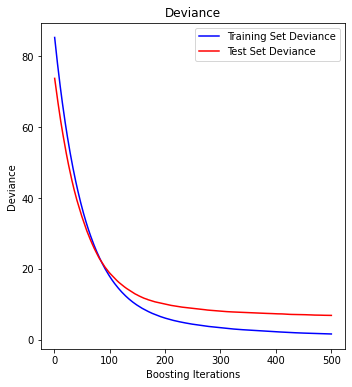

In [10]:
#Plot training deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

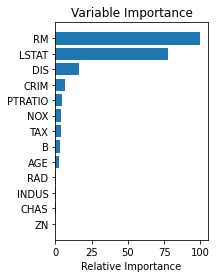

In [11]:
#Feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()